Проект направлен на аналитическую оценку текущего состояния нового маркетплейса, специализирующегося на продаже бразильских товаров, и выработку решений для его роста. В рамках проекта предстоит провести анализ поведения пользователей, оценить ключевые метрики, выявить наличие product/market fit и оценить обоснованные гипотезы для повышения выручки без ущерба для клиентского опыта.


### 1) `olist_customers_dataset.csv` — Таблица с уникальными идентификаторами пользователей

| Поле | Описание |
|---|---|
| `customer_id` | Позаказный идентификатор пользователя |
| `customer_unique_id` | Уникальный идентификатор пользователя |
| `customer_zip_code_prefix` | Почтовый индекс пользователя |
| `customer_city` | Город доставки пользователя |
| `customer_state` | Штат доставки пользователя |

---

### 2) `olist_orders_dataset.csv` — Таблица заказов

| Поле | Описание |
|---|---|
| `order_id` | Уникальный идентификатор заказа (номер чека) |
| `customer_id` | Позаказный идентификатор пользователя |
| `order_status` | Статус заказа:<br>• `created` — создан<br>• `approved` — подтверждён<br>• `invoiced` — выставлен счёт<br>• `processing` — в процессе сборки заказа<br>• `shipped` — отгружён со склада<br>• `delivered` — доставлен пользователю<br>• `unavailable` — отменён по причине недоступности товара<br>• `canceled` — отменён |
| `order_purchase_timestamp` | Время создания заказа |
| `order_approved_at` | Время подтверждения оплаты заказа |
| `order_delivered_carrier_date` | Время передачи заказа в логистическую службу |
| `order_delivered_customer_date` | Время доставки заказа |
| `order_estimated_delivery_date` | Обещанная дата доставки |

---

### 3) `olist_order_items_dataset.csv` — Товарные позиции, входящие в заказы

| Поле | Описание |
|---|---|
| `order_id` | Уникальный идентификатор заказа (номер чека) |
| `order_item_id` | Идентификатор товара внутри одного заказа |
| `product_id` | Идентификатор товара (аналог штрихкода) |
| `seller_id` | Идентификатор производителя товара |
| `shipping_limit_date` | Максимальная дата доставки продавцом для передачи заказа партнёру по логистике |
| `price` | Цена за единицу товара |
| `freight_value` | Стоимость доставки товара |


In [40]:
import pandas as pd
from operator import attrgetter
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import colors as mcolors
import numpy as np

In [4]:
customers_dataset = pd.read_csv('olist_customers_dataset.csv')
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders_dataset = pd.read_csv('olist_orders_dataset.csv')
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
items_dataset = pd.read_csv('olist_order_items_dataset.csv')
items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#1 Оценка месячного retention в оформление заказа с помощью когортного анализа.

На первом этапе решили посмотреть на метрики маркетплейса и на возвращаемость клиента в продукт.
Для этого было принято решение:
Оценить месячный retention в оформление заказа с помощью когортного анализа, так как важно, чтобы клиенты возвращались в маркетплейс для совершения больших покупок.

In [8]:
# конвертация столбцов, которые содержат даты и время, в соответсвующий формат
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])
orders_dataset['order_approved_at'] = pd.to_datetime(orders_dataset['order_approved_at'])
orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(orders_dataset['order_delivered_carrier_date'])
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])

In [9]:
orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [10]:
orders_dataset.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [11]:
# Объединение данных таблиц (клиенты и заказы) по ключу customer_id
orders_merged_customers_dataset = pd.merge(orders_dataset, customers_dataset, how='left', on='customer_id')
orders_merged_customers_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [12]:
# Копия данных, чтобы избежать изменений в исходном DataFrame
orders_merged_customers_dataset_copy = orders_merged_customers_dataset.copy()

In [13]:
# Считаю retention только по доставленным заказам, поэтому делаю промежуточный датафрейм только со статусом "delivered" и убираю лишние колонки
df_task1 = orders_merged_customers_dataset.query('order_status =="delivered"')[['order_id', 'customer_unique_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_delivered_customer_date']]
df_task1.head()

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02


In [14]:
df_task1.isna().sum()

order_id                         0
customer_unique_id               0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    8
dtype: int64

In [15]:
# Извлекаю месяц и день заказа
df_task1['order_purchase_MONTH'] = df_task1['order_purchase_timestamp'].dt.to_period('M')
df_task1['order_purchase_DAY'] = df_task1['order_purchase_timestamp'].dt.to_period('D')
df_task1.head()

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_MONTH,order_purchase_DAY
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10,2017-10-02
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02,2018-02-13


In [16]:
df_task1['order_purchase_MONTH'].max()

Period('2018-08', 'M')

In [17]:
# Присваиваю когорты на основе даты первого действия для каждого пользователя
df_task1['cohort_MONTH'] = df_task1.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')
df_task1['cohort_DAY'] = df_task1.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('D')
df_task1.head()

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_MONTH,order_purchase_DAY,cohort_MONTH,cohort_DAY
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10,2017-10-02,2017-09,2017-09-04
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-07,2018-07-24,2018-07,2018-07-24
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-08,2018-08-08,2018-08,2018-08-08
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-11,2017-11-18,2017-11,2017-11-18
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02,2018-02-13,2018-02,2018-02-13


In [18]:
# Рассчитываю номер периода в днях
df_task1['period_number_month'] = np.floor((df_task1.order_purchase_DAY - df_task1.cohort_DAY).apply(attrgetter('n')) / 30)
df_task1.tail()

,order_id,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_MONTH,order_purchase_DAY,cohort_MONTH,cohort_DAY,period_number_month
99436,9c5dedf39a927c1b2549525ed64a053c,6359f309b166b0196dbf7ad2ac62bb5a,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-17 15:08:01,2017-03,2017-03-09,2017-03,2017-03-09,0.0
99437,63943bddc261676b46f01ca7ac2f7bd8,da62f9e57a76d978d02ab5362c509660,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,2018-02,2018-02-06,2018-02,2018-02-06,0.0
99438,83c1379a015df1e13d02aae0204711ab,737520a9aad80b3fbbdad19b66b37b30,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,2017-08,2017-08-27,2017-08,2017-08-27,0.0
99439,11c177c8e97725db2631073c19f07b62,5097a5312c8b157bb7be58ae360ef43c,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,2018-01,2018-01-08,2018-01,2018-01-08,0.0
99440,66dea50a8b16d9b4dee7af250b4be1a5,60350aa974b26ff12caad89e55993bd6,edb027a75a1449115f6b43211ae02a24,delivered,2018-03-08 20:57:30,2018-03-16 13:08:30,2018-03,2018-03-08,2018-03,2018-03-08,0.0


In [19]:
# Агрегирую данные по когортам и рассчитанному номеру периода (в месяцах)
df_cohort = df_task1.groupby(['cohort_MONTH', 'period_number_month']).agg(n_customers=('customer_unique_id', 'nunique')).reset_index()
df_cohort.head()

,cohort_MONTH,period_number_month,n_customers
0,2016-09,0.0,1
1,2016-10,0.0,262
2,2016-10,6.0,1
3,2016-10,9.0,1
4,2016-10,11.0,1


In [20]:
# Создаю сводную таблицу для когортного анализа
cohort_pivot = df_cohort.pivot_table(index='cohort_MONTH', columns='period_number_month', values='n_customers')
cohort_pivot

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort_MONTH,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,262.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,717.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1628.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,2.0,4.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,6.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,5.0,6.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3451.0,14.0,14.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,15.0,11.0,5.0,16.0,9.0,6.0,4.0,10.0,...,9.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Рассчитываю размеры когорт (первый столбец сводной таблицы)
cohort_size = cohort_pivot.iloc[:, 0]
cohort_size

cohort_MONTH
2016-09       1.0
2016-10     262.0
2016-12       1.0
2017-01     717.0
2017-02    1628.0
2017-03    2503.0
2017-04    2256.0
2017-05    3451.0
2017-06    3037.0
2017-07    3752.0
2017-08    4057.0
2017-09    4004.0
2017-10    4328.0
2017-11    7060.0
2017-12    5338.0
2018-01    6842.0
2018-02    6288.0
2018-03    6774.0
2018-04    6582.0
2018-05    6506.0
2018-06    5878.0
2018-07    5949.0
2018-08    6144.0
Freq: M, Name: 0.0, dtype: float64

In [22]:
# Вычисляю retention  в долях, деля на размер когорты
retention_matrix = cohort_pivot.divide(cohort_size, axis=0)
retention_matrix

period_number_month,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,...,11.0,12.0,13.0,14.0,15.0,16.0,17.0,19.0,20.0,21.0
cohort_MONTH,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,1.0,NaN,NaN,NaN,NaN,NaN,0.003817,NaN,NaN,0.003817,...,0.003817,NaN,0.003817,NaN,0.003817,NaN,0.003817,0.007634,0.003817,0.003817
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,1.0,0.002789,NaN,0.005579,0.001395,0.001395,0.002789,0.002789,NaN,NaN,...,0.005579,0.004184,0.002789,NaN,0.002789,0.002789,0.002789,0.001395,NaN,NaN
2017-02,1.0,0.001229,0.001843,0.003686,0.002457,0.001229,0.002457,0.000614,0.001229,0.002457,...,0.003686,0.000614,0.001843,0.001229,0.000614,0.000614,0.001843,NaN,NaN,NaN
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002397,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,NaN,NaN,NaN
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002216,0.002660,...,0.001330,NaN,0.000887,0.000887,0.000887,0.000887,NaN,NaN,NaN,NaN
2017-05,1.0,0.004057,0.004057,0.002318,0.003767,0.003187,0.003187,0.001159,0.002898,0.002608,...,0.003187,0.001739,0.000869,0.002028,0.001159,NaN,NaN,NaN,NaN,NaN
2017-06,1.0,0.004281,0.004939,0.003622,0.001646,0.005268,0.002963,0.001976,0.001317,0.003293,...,0.002963,0.000988,0.002963,0.001317,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
#медианный retention 1-го месяца
mediana_1st_month = retention_matrix[1].median()
mediana_1st_month

0.0035460992907801418

In [24]:
# Вычисление когорты с самым высоким retention на 3-й месяц
max_3rd_month = retention_matrix[3].max()
max_3rd_month
retention_matrix[3].idxmax()

Period('2017-01', 'M')

#2 Существует ли product/market fit у маркетплейса?

На следующем этапе необходимо определить, существует ли product/market fit у данного маркетплейса, можно ли масштабировать подобный продукт на новые рынки. Есть вероятность, что маркетплейс будет приносить убытки.

Вывод: Для проведения полноценного расчета метрик LTV и CPA на данном этапе недостаточно данных, нет информации о стоимости привлечения новых клиентов ни в целом, ни по отдельным каналам, поэтому расчет юнит-экономики невозможен. Однако, на основе расчитанного на прошлом этапе удержания клиентов, можно сказать, что retention колеблется в пределах долей процента (околонулевой) начиная  первого месяца. Поэтому можно сделать вывод, что продукт (Маркетплейс) на данный момент не имеет product/market fit, попытки масштабрования могут привести к негативным эффектам, в первую очередь надо повышать показатели retention (стремиться, чтобы клиенты были удовлетворены свом опытом в продукте и возвращались с повторными заказами). Основная цель — понять, кому и зачем нужен продукт, и как сделать его по-настоящему ценным, я бы предложила провести интервью с пользователями, узнать: 
-Почему они не вернулись?
-Что им понравилось/не понравилось?
-Какие альтернативы они используют?

#3 Выбор основных метрик для дальнейшего аналлиза с целью максимизации прибыли компании.

В первую очередь необходимо определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.
Метрики должны отражать рост объёма продаж маркетплейса, показывать объем аудитории, отражать заинтересованность новых клиентов в продукте, отражать вовлеченность клиента в продолжение использования продукта, отражать денежное выражение вовлеченности клиента.

1)  GMV (Gross Merchandise Value) — Валовой объем продаж 
2)  MAU (Monthly Active Users) — Ежемесячные активные пользователи
3)  Конверсия в платящего
4)  Retention
5)  ARPPU (Average Revenue Per Paying User) — Средняя выручка на платящего пользователя

In [29]:
#1 Подготовка нужного набора данных: беру датафрейм, рассчитанный ранее и  объединяю с данными из таблицы items_dataset по ключу order_id

df_task3 = pd.merge(items_dataset, df_task1, how='left', on='order_id')
df_task3.head() 

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_MONTH,order_purchase_DAY,cohort_MONTH,cohort_DAY,period_number_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09,2017-09-13,2017-09,2017-09-13,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-04,2017-04-26,2017-04,2017-04-26,0.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-01,2018-01-14,2018-01,2018-01-14,0.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08,2018-08-08,2018-08,2018-08-08,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-02,2017-02-04,2017-02,2017-02-04,0.0


In [30]:
# Считаю оборот за каждый месяц (GMV (Gross Merchandise Value) — Валовой объем продаж )
GMV_monthly = df_task3.groupby('order_purchase_MONTH', as_index=False).agg({'price': 'sum'}).rename(columns={'price': 'GMV'})
GMV_monthly['order_purchase_MONTH'] = GMV_monthly['order_purchase_MONTH'].astype(str)
GMV_monthly.head()

,order_purchase_MONTH,GMV
0,2016-09,134.97
1,2016-10,40325.11
2,2016-12,10.90
3,2017-01,111798.36
4,2017-02,234223.40


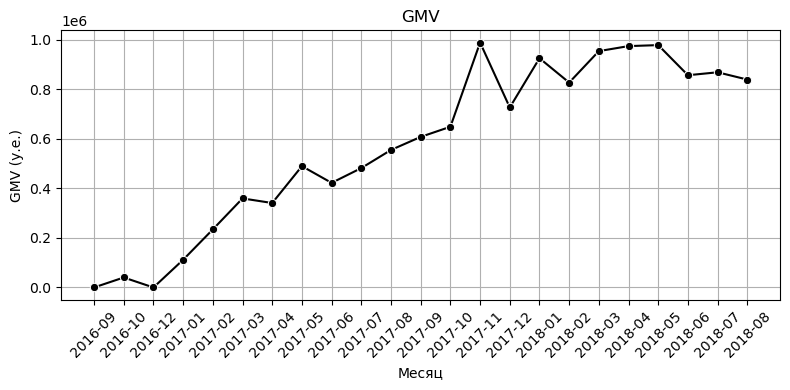

In [31]:
# Построение графика GMV за анализируемый период
plt.figure(figsize=(8, 4))
sns.lineplot(data=GMV_monthly, x='order_purchase_MONTH', y='GMV', marker='o', color='black')
plt.title('GMV')
plt.xlabel('Месяц')
plt.ylabel('GMV (у.е.)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

In [32]:
#2 Расчет метрики MAU (Monthly Active Users) — Ежемесячные активные пользователи
# мне нужно посчитать количество уникальных клиентов за каждый анализируемый месяц 
MAU = df_task3.groupby('order_purchase_MONTH', as_index=False).agg({'customer_unique_id': 'nunique'}).rename(columns={'customer_unique_id': 'MAU'})
MAU['order_purchase_MONTH'] = MAU['order_purchase_MONTH'].astype(str)
MAU.head()

,order_purchase_MONTH,MAU
0,2016-09,1
1,2016-10,262
2,2016-12,1
3,2017-01,718
4,2017-02,1630


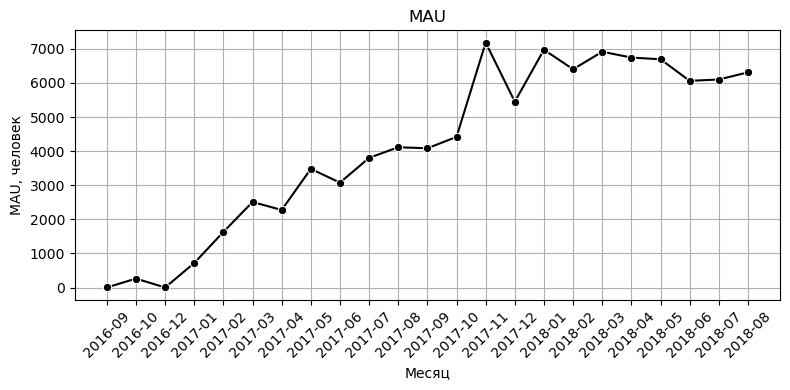

In [33]:
# Построение графика MAU за анализируемый период
plt.figure(figsize=(8, 4))
sns.lineplot(data=MAU, x='order_purchase_MONTH', y='MAU', marker='o', color='black')
plt.title('MAU')
plt.xlabel('Месяц')
plt.ylabel('MAU, человек')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

№3 Для расчета доли "Конверсия в платящего" нужно "Число платящих пользователей" разделить на "Число всех активных или зарегестированных пользователей", но в исходных таблицах нет информации о зарегестированных пользователях, поэтому по третьему пункту я могу только выбрать метрику, но не расчитать ее, нужно делать запрос доролнительных данных 

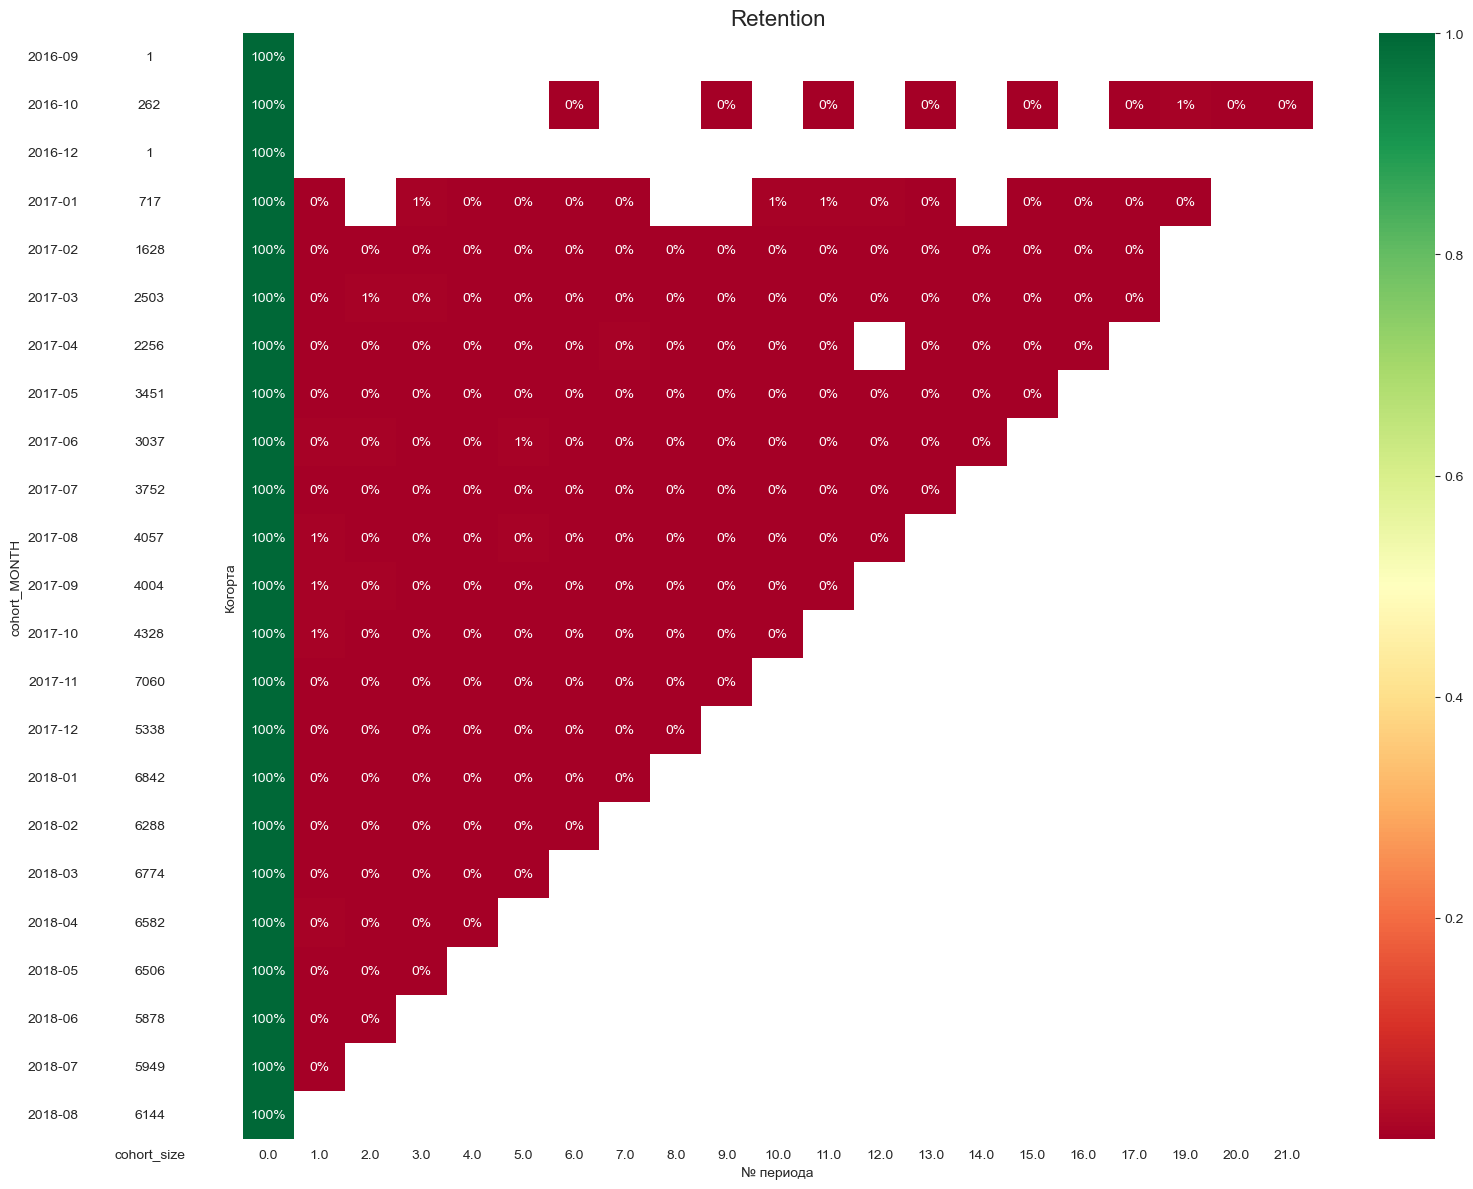

In [35]:
#4 Строю тепловую карту когортного анализа, чтобы визуализировать метрику Retention 
with sns.axes_style("white"):
    fig, ax = plt.subplots(1, 2, figsize=(16, 12), sharey=True, gridspec_kw={'width_ratios': [1, 11]})

    # Тепловая карта для коэффициентов удержания
    sns.heatmap(retention_matrix,
                mask=retention_matrix.isnull(),
                annot=True,
                fmt='.0%',
                cmap='RdYlGn',
                ax=ax[1])
    ax[1].set_title('Retention', fontsize=16)
    ax[1].set(xlabel='№ периода', ylabel='Когорта')

    # Тепловая карта для размеров когорт
    cohort_size_df = pd.DataFrame(cohort_size).rename(columns={0: 'cohort_size'})
    white_cmap = mcolors.ListedColormap(['white'])
    sns.heatmap(cohort_size_df,
                annot=True,
                cbar=False,
                fmt='g',
                cmap=white_cmap,
                ax=ax[0])

    fig.tight_layout()
    plt.show()

In [36]:
#5 Расчет метрики ARPPU (Average Revenue Per User) — Средняя выручка на платящего пользователя
# ARPPU = Общая выручка / MAU
df_task3.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_unique_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_purchase_MONTH,order_purchase_DAY,cohort_MONTH,cohort_DAY,period_number_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,871766c5855e863f6eccc05f988b23cb,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-20 23:43:48,2017-09,2017-09-13,2017-09,2017-09-13,0.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,eb28e67c4c0b83846050ddfb8a35d051,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-05-12 16:04:24,2017-04,2017-04-26,2017-04,2017-04-26,0.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,3818d81c6709e39d06b2738a8d3a2474,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-22 13:19:16,2018-01,2018-01-14,2018-01,2018-01-14,0.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,af861d436cfc08b2c2ddefd0ba074622,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-14 13:32:39,2018-08,2018-08-08,2018-08,2018-08-08,0.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,64b576fb70d441e8f1b2d7d446e483c5,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-03-01 16:42:31,2017-02,2017-02-04,2017-02,2017-02-04,0.0


In [37]:
ARPPU_df = pd.merge(GMV_monthly, MAU, on='order_purchase_MONTH')
ARPPU_df['ARPPU'] = ARPPU_df['GMV']/ARPPU_df['MAU']
ARPPU_df

,order_purchase_MONTH,GMV,MAU,ARPPU
0,2016-09,134.97,1,134.970000
1,2016-10,40325.11,262,153.912634
2,2016-12,10.90,1,10.900000
3,2017-01,111798.36,718,155.708022
4,2017-02,234223.40,1630,143.695337
5,2017-03,359198.85,2508,143.221232
6,2017-04,340669.68,2274,149.810765
7,2017-05,489338.25,3479,140.654858
8,2017-06,421923.37,3076,137.166245
9,2017-07,481604.52,3802,126.671362


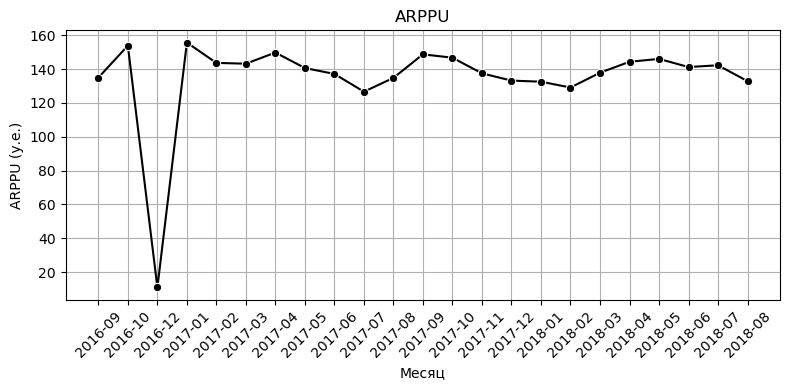

In [42]:
# Построение графика ARPU за анализируемый период
plt.figure(figsize=(8, 4))
sns.lineplot(data=ARPPU_df, x='order_purchase_MONTH', y='ARPPU', marker='o', color='black')
plt.title('ARPPU')
plt.xlabel('Месяц')
plt.ylabel('ARPPU (у.е.)')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()

#4 Оцениваем 3 основных гипотезы с помощью фреймворка ICE.

Командой продукта было сформулировано 3 гипотезы. По каждой гипотезе команда заполнила показатели по Ease, Confidence. Моя задача - заполнить показатель — Impact. 
Для расчёта Impact использую данные с июня 2017 года. Считаю, что конверсия в повторный заказ равна величине медианного retention 1-го месяца (см. пункт 1 проекта).

In [44]:
# Подсчет количества отмененных заказов, я беру в расчет заказы со статусами
#    unavailable — заказ отменён по причине недоступности товара
#    canceled — отменён
cancelled_orders = orders_dataset.query('order_status == "unavailable" or order_status == "canceled"')
cancelled_orders_june_2017 = cancelled_orders.query('order_purchase_timestamp > "2017-05-31"')
cancelled_orders_june_2017.head()
num_cancelled = cancelled_orders_june_2017['order_id'].nunique()
num_cancelled

980

Колличество отмененных заказов равно 980, по приведенной комадой шкале, получаем значение Impact_1 = 5 
Сама первая гипотеза звучит так: Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен. Буду суммировать заказы с обоими статусами отмен и не зависимо от того, что один клиент мог сделать несколько заказов. Кейс, когда клиент сделал заказ, но потом оказалось, что товар отсутсвует, я тоже отнесу к этому багу, так как, с моей точки зрения, случай, когда маркетплейс позволяет тебе добавить товар в корзину, хотя заведомо известно, что он out of stock, ненормально и требует доработки.
ICE_1 = 5 * 8 * 6 = 240

In [46]:
# Подсчет количества заказов, доставденных с задержкой
opazduni = orders_dataset.query('order_estimated_delivery_date < order_delivered_customer_date and order_purchase_timestamp > "2017-05-31" and order_status == "delivered"')
num_delayed =  opazduni['order_id'].nunique()
# подсчет количества клиентов, которые получили свои заказы с задержкой
customers_dissap = opazduni[['order_id', 'customer_id']].merge(customers_dataset[['customer_unique_id', 'customer_id']], on = 'customer_id').customer_unique_id.nunique() 
print(num_delayed, customers_dissap)

7298 7248


Так как оба значения попадают по шкале в один диапазон, буду отталкиваться от количества "обиженных" клиентов.
Колличество клиентов, получивших свой заказ позже,  равно 7248, умножаем на конверсию (медианного retention 1-го месяца = 0,0035), таким образом, получаем количество потенциальных повторных заказов = 25
по приведенной в задании шкале, получаем значение Impact_2 = 1 
ICE_2 = 1 * 10 * 4 = 40

In [48]:
# Подсчет количества потенциальных повторных заказов
reactive = orders_dataset.query('order_purchase_timestamp > "2017-05-31" and order_status == "delivered"')
num_all =  reactive['order_id'].nunique()
num_all

85531

Колличество всех заказов равно 85531, умножаем на конверсию (медианного retention 1-го месяца = 0,0035), таким образом, получаем количество потенциальных повторных заказов = 299
по приведенной в задании шкале, получаем значение Impact_3 = 3 
ICE_3 = 3 * 5 * 9 = 135

ICE_1 = 5 * 8 * 6 = 240
ICE_2 = 1 * 10 * 4 = 40
ICE_3 = 3 * 5 * 9 = 135
Таким образом, приоритетной является первая гипотеза "Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен".

In [ ]:
1. Формулировка проблемы продукта:
На данный момент наблюдается отсутствие динамики в росте выручки.

2. Выводы на основе анализа (пункт 1):
Когортный анализ показал, что показатель удержания крайне низок — менее 1% пользователей возвращаются 
за повторной покупкой. Таким образом, текущий уровень выручки обеспечивается в основном за счет
постоянного привлечения новых клиентов, а не за счет лояльной базы.

3. Выводы на основе анализа (пункт 2):
Выводы из предыдущего этапа указывают на слабую степень соответствия продукта рынку (product/market fit).
Это может быть следствием низкой воспринимаемой ценности предложения, несоответствия ожиданиям пользователей, 
проблем с качеством сервиса, оформления заказов или доставки.
Отсутствие устойчивого соответствия между продуктом и потребностями целевой аудитории
делает масштабирование на новые сегменты рискованным. Для устойчивого роста маркетплейсу
следует в первую очередь сосредоточиться на улучшении клиентского удержания.

4. Выводы на основе анализа (пункт 3):
Для того чтобы маркетплейс мог эффективно увеличивать прибыль, необходимо ориентироваться на следующие ключевые показатели:
    GMV (Gross Merchandise Value) — совокупный объем продаж на платформе.
    Monthly Active Users — общее количество пользователей, совершающих покупки за мсяц.
    Conversion to Paying Users — доля новых пользователей, совершивших первую покупку.
    Retention Rate — показатель удержания, отражающий, сколько клиентов возвращаются за повторными покупками.
    ARPPU (Average Revenue Per Paying User) — средний доход, приходящийся на одного платящего пользователя.
Фокус на улучшении этих метрик будет способствовать росту выручки и устойчивому развитию бизнеса.

5. Выводы на основе анализа (пункт 4):
Анализ гипотез по методике ICE выявил, что наибольший потенциал для роста ключевых показателей
содержит первая гипотеза. В ней предлагается устранение технической ошибки в системе обработки заказов, 
что позволит избежать массовых отмен. ICE-оценка этой гипотезы составила  240 — наивысший результат среди
протестированных вариантов.
Решение проблемы с отменами заказов должно привести к увеличению числа успешно завершённых доставок. 
Это улучшит пользовательский опыт, повысит удовлетворённость клиентов, а также окажет положительное влияние 
на уровень удержания и среднюю выручку на пользователя (ARPPU). Кроме того, в долгосрочной перспективе снижение
числа возвратов и отмен может помочь оптимизировать переменные издержки, связанные с логистикой и клиентским сервисом.

6. Выводы на основе анализа (пункт 5):
Принятая гипотеза №1 окажет влияние на следующие показатели:
    Целевая метрика: Число доставленных заказов — отражает общее количество покупок, завершённых успешной
доставкой за определённый период.
    Промежуточная метрика (прокси): Среднее время процессинга заказа — Если фикс работает, время процессинга должно 
стать стабильнее и короче.
    Контрольная (защитная) метрика: Delivery Rate = (Доставленные заказы) / (Все оформленные заказы) — доля успешно
доставленных заказов. Этот показатель позволяет отслеживать эффективность воронки
продаж и мотивацию пользователей завершить покупку.

7. Общий вывод по результатам анализа:
Основная причина отсутствия выручечного роста — крайне низкий уровень удержания: менее 1% клиентов совершают 
повторные покупки. Весь доход поддерживается в основном за счёт постоянного притока новых пользователей. 
Это свидетельствует о слабом соответствии продукта потребностям рынка (product/market fit), что делает
масштабирование бизнеса преждевременным и рисковым.
Повышение Retention должно стать ключевой задачей — только за счёт возврата клиентов возможно обеспечить
стабильный и прогнозируемый рост ключевых бизнес-метрик.

8. Продуктовые рекомендации:
В краткосрочной перспективе необходимо в приоритетном порядке устранить техническую ошибку в 
системе обработки заказов, которая приводит к их отмене. Это напрямую повлияет на увеличение доставок,
рост выручки, прибыли, ARPU, уровня удовлетворённости клиентов (CSAT) и Retention.
В долгосрочной перспективе маркетплейсу важно выстраивать крепкие отношения с пользователями: предоставлять
качественный и надёжный сервис, внедрять персонализированные предложения и оптимизировать пользовательский путь.
Такой подход позволит снизить отток клиентов и стимулировать повторные покупки.